# Final Project Submission

Please fill out:
* Student name: Keith Byron Otuomagie
* Student pace: self paced
* Scheduled project review date/time: Friday, August 16th, 2024 / 10:00 AM (EST)
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@otuomagie/beginnings-in-data-science-3a0718647be4

# Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


## Data Source, Data Analysis, and Recommendations

The data for the solving the business problem comes from the National Transportation Safety Board (NTSB).  It includes aviation data from 1962 to 2023.

I obtained the NTSB data from the following link - https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

I set out to solve the business problem by providing the following three recommendations:

1. Aircraft Manufacturers that should be considered for purchase based upon Fatalities per Aircraft Manufacturer Accident Record

2. Aircraft Manufacturers that should be considered for purchase based upon Major Injuries per Aircraft Manufacturer Accident Record

3. Aircraft Manufacturers that should be considered for purchase based upon Minor Injuries per Aircraft Manufacturer Accident Record

In [1]:
# I importing the Python librarires I believe I will need to perform the Phase 1 project
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the csv file into a Pandas Dataframe
# THe following code - encoding='latin-1' - is utilized because the file specified coding is not 'utf-8'. The codding is "latin-1".
# The following code - dtype={'Latitude': str, 'Longitude': str, 'Broad.phase.of.flight': str}) - is utilized becuase there are columns - namely, Column 6, that has both strings and numbers.  The code converts all of the data in Column 6 to string type

df = pd.read_csv("AviationData.csv", encoding='latin-1', dtype={'Latitude': str, 'Longitude': str, 'Broad.phase.of.flight': str})

## Exploratory Data Analysis

When I work in pandas, I like to being running exploratory data analysis to become familiar with the dataframe.  I want to understand some of the following attributes:

1. Number of columns
2. Number of rows
3. Columns Names
4. Type of Data within the Columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
# Looking at the first five columns of the pandas dataframe
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
# Looking at the last five columns of the pandas dataframe
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,12/29/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Based on the preliminary analysis, the follwing columns: 1) Latitude, 2) Longitude, 3) Airport Code, 4) Airport Name, 
5) Air Carrier has missing data.  I may want to consider removing the columns.  I am going to see how many rows and columns of
data have missing or undefined data.
    

In [6]:
df.shape

(88889, 31)

In [7]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Based on the following code - df.isna().sum():
    
1) The "Latitude" column is missing data for 54,507 of its rows
2) The "Longitude" column is missing data for 54,516 of its rows
3) The "Aircraft Category" is missing data for 56,602 of its rows
4) The "FAR.Description" is missing data for 56,866 of its rows
5) The "Schedule" column is missing data for 76,307 of its rows
6) The "Air Carrier" column is missing data for 72,241 of its rows

As another check, I am going to examine whether or not there are any rows of duplicate data within the Aviation Data file.

In [8]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


There are no rows of duplicate data within the Aviation Data file.  However, I will remove the following columns - 1) "Latitude, 2) "Longitude", 3) "Aircraft Category", 4) "FAR.Description", 5) "Schedule", and 6) "Air Carrier" - since their missing rows of data represents a majority of the number of rows present in the Aviation Data file.

In [9]:
df = df.drop(columns=['Latitude','Longitude','Aircraft.Category','FAR.Description','Schedule','Air.carrier'])

In [10]:
# Checking whether or not the aforementioned 6 columns have been revmoved from the Aviation Data file

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50249 non-null  object 
 7   Airport.Name            52790 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Registration.Number     87572 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur.Built           88787 non-null  object 
 14  Number.of.Engines       82805 non-null

In [11]:
# Another check to determine whether or not the aforementioned 6 columns have been revmoved from the Aviation Data file

df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

I am going to explore the following column - Investigation.Type.

In [12]:
df['Investigation.Type'].unique()

array(['Accident', 'Incident'], dtype=object)

In [13]:
df['Investigation.Type'].nunique()

2

In [14]:
df['Investigation.Type'].value_counts()

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

## Additional and Initial Analysis

I utilized Tableau to conduct additional and initial analysis of the data.

Analysis can be accessed via the following link: https://public.tableau.com/app/profile/keith.otuomagie/viz/aircraft_analysis_kbo_2024_08_03/SafetyRecordperAircraftManufacturer

I examined the following: 

1. Total Number of Fatalities incurred by each Aircraft Manufacturer
2. Total Number of Serious Injuries incurred by each Aircraft Manufacturer
3. Total Number of Minor Injuries incurred by each Aircraft Manufacturer


The top 5 Aircraft Manufacturers that incurred the most fatalities are the following:

1. Cessna (9,641 total fatalities)
2. Boeing (8,748 total fatalities)
3. Piper (6,689 total fatalities)
4. Beech (3,784 total fatalities)
5. Bell (1,332 total fatalities)


The top 5 Aircraft Manufacturers that incurred the most serious injuries are the following:

1. Cessna (4,894 total serious injuries)
2. Piper (3,059 total serious injuries)
3. Boeing (2,157 total serious injuries)
4. Beech (1,095 total serious injuries)
5. Bell (878 total serious injuries)


The top 5 aircraft manufacturers that incurred the most minor injuries are the following:

1. Cessna (6,876 total minor injuries)
2. Piper (3,757 total minor injuries)
3. Boeing (2,761 total minor injuries)
4. McDonnell Douglas (1,505 total minor injuries)
5. Beech (1,122 total minor injuries)

This is not a complete way to determine which aircraft manufacturers have the best (or worst) safety because each aircraft manufacturer has a different amount of records within the Aviation data file.

## Continuing Exploratory Data Analysis

I am going to continue additional exploratory analysis via pandas.  I want to see how many Aircraft Manufacturers are represented in the Aviation Data file.

In [15]:
df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [16]:
df['Make'].nunique()

8237

Based on the following code - df['Make'].nunique() - there are 8,237 unique Plane Makes in the Aviation Data file.

In [17]:
df['Make'].value_counts()

Cessna                22227
Piper                 12029
CESSNA                 4922
Beech                  4330
PIPER                  2841
                      ...  
Kevin Leue                1
Falcon Special            1
CROMAN CORPORATION        1
Current                   1
Plocher                   1
Name: Make, Length: 8237, dtype: int64

In [18]:
df['Make'].value_counts()[0:60]

Cessna                            22227
Piper                             12029
CESSNA                             4922
Beech                              4330
PIPER                              2841
Bell                               2134
Boeing                             1594
BOEING                             1151
Grumman                            1094
Mooney                             1092
BEECH                              1042
Robinson                            946
Bellanca                            886
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Mcdonnell Douglas                   526
Aeronca                             487
Maule                               445
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342


Examining the following code - df['Make'].value_counts()[0:50] - I see that there are more records for certain Aircraft Manufacturers than others. In order to eventually provide a series of recommendations, I may need to consider a subset of the Aircraft Manufacturers.

I have also made the following observations, which are the following:
1. Cessna is spelled in both capital letters and lower case letters;
2. Piper is spelled in both capital letters and lower case letters;
3. Boeing is spelled in both capital letters and lower case letters;
4. Airbus is represented with the following two spellings - "AIRBUS" and "Airbus Industrie";
5. Douglas is represented with the following two spellings - "Mcdonnell Douglas" and "Douglas";
6. Beech is spelled in both capital letters and lower case letters;
7. Robinson is spelled in both capital letters and lower case letters;
8. Bell is spelled in both capital letters and lower case letters;
9. Grumman is represented with the following two spellings - "Grumman" and "Grumman American";
10. Mooney is spelled in both capital letters and lower case letters;
11. Hughes is spelled in both capital letters and lower case letters;
12. Schweizer is spelled in both capital letters and lower case letters;
13. Aeronca is spelled in both capital letters and lower case letters;
14. Maule is spelled in both capital letters and lower case letters;
15. Bellanca is spelled in both capital letters and lower case letters;
16. Embraera is spelled in both capital letters and lower case letters;
17. Air Tractor is spelled in both capital letters and lower case letters;
18. Luscombe is spelled in both capital letters and lower case letters;
19. De Havilland is spelled in both capital letters and lower case letters;
20. Stinson is spelled in both capital letters and lower case letters;
21. North American is spelled in both capital letters and lower case letters;
22. Sikorsky is spelled in both capital letters and lower case letters.

In [19]:
# Changing all of the spellings of Cessna to "Cessna"

df.loc[df['Make'] == 'CESSNA', 'Make'] = "Cessna"

In [20]:
# Checking to see whether or not all of the spellings of Cessna are "Cessna"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             12029
Beech                              4330
PIPER                              2841
Bell                               2134
Boeing                             1594
BOEING                             1151
Grumman                            1094
Mooney                             1092
BEECH                              1042
Robinson                            946
Bellanca                            886
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Mcdonnell Douglas                   526
Aeronca                             487
Maule                               445
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331


In [21]:
# Changing all of the spellings of Piper to "Piper"

df.loc[df['Make'] == 'PIPER', 'Make'] = "Piper"

In [22]:
# Checking to see whether or not the spellings of Piper are "Piper"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              4330
Bell                               2134
Boeing                             1594
BOEING                             1151
Grumman                            1094
Mooney                             1092
BEECH                              1042
Robinson                            946
Bellanca                            886
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Mcdonnell Douglas                   526
Aeronca                             487
Maule                               445
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321


In [23]:
# Changing all of the spellings of Boeing to "Boeing"

df.loc[df['Make'] == 'BOEING', 'Make'] = "Boeing"

In [24]:
# Checking to see whether or not all of the spellings of Boeing are "Boeing"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              4330
Boeing                             2745
Bell                               2134
Grumman                            1094
Mooney                             1092
BEECH                              1042
Robinson                            946
Bellanca                            886
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Mcdonnell Douglas                   526
Aeronca                             487
Maule                               445
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319


In [25]:
# Changing all of the spellings of Airbus to "Airbus"

df.loc[df['Make'] == 'AIRBUS', 'Make'] = "Airbus"
df.loc[df['Make'] == 'Airbus Industrie', 'Make'] = "Airbus"

In [26]:
# Checking to see whether or not the spellings of Airbus are now "Airbus"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              4330
Boeing                             2745
Bell                               2134
Grumman                            1094
Mooney                             1092
BEECH                              1042
Robinson                            946
Bellanca                            886
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Mcdonnell Douglas                   526
Aeronca                             487
Maule                               445
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321


In [27]:
# Changing all of the spellings of McDonnell Douglas to "McDonnell Douglas"

df.loc[df['Make'] == 'Douglas', 'Make'] = "Mcdonnell Douglas"
df.loc[df['Make'] == 'MCDONNELL DOUGLAS', 'Make'] = "Mcdonnell Douglas"

In [28]:
# Checking to see whether or not the spellings of McDonnell Douglas are now "McDonnell Douglas"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              4330
Boeing                             2745
Bell                               2134
Grumman                            1094
Mooney                             1092
BEECH                              1042
Robinson                            946
Bellanca                            886
Mcdonnell Douglas                   859
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Aeronca                             487
Maule                               445
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321


In [29]:
# Changing all of the spellings of Beech to "Beech"

df.loc[df['Make'] == 'BEECH', 'Make'] = "Beech"

In [30]:
# Checking to see whether or not the spellings of Beech are now "Beech"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2134
Grumman                            1094
Mooney                             1092
Robinson                            946
Bellanca                            886
Mcdonnell Douglas                   859
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Aeronca                             487
Maule                               445
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319


In [31]:
# Changing all of the spellings of Robinson to "Robinson"

df.loc[df['Make'] == 'ROBINSON', 'Make'] = "Robinson"

In [32]:
# Checking to see whether or not the spellings of Robinson are now "ROBINSON"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2134
Robinson                           1230
Grumman                            1094
Mooney                             1092
Bellanca                            886
Mcdonnell Douglas                   859
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Aeronca                             487
Maule                               445
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319


In [33]:
# Changing all of the spellings of Bell to "Bell"

df.loc[df['Make'] == 'BELL', 'Make'] = "Bell"

In [34]:
# Checking to see whether or not the spellings of Bell are now "Bell"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Robinson                           1230
Grumman                            1094
Mooney                             1092
Bellanca                            886
Mcdonnell Douglas                   859
Hughes                              795
Schweizer                           629
Air Tractor                         595
Aeronca                             487
Maule                               445
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [35]:
# Changing all of the spellings of Grumman to "Grumman"

df.loc[df['Make'] == 'Grumman American', 'Make'] = "Grumman"
df.loc[df['Make'] == 'GRUMMAN', 'Make'] = "Grumman"

In [36]:
# Checking to see whether or not the spellings of Grumman are now "Grumman"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Robinson                           1230
Mooney                             1092
Bellanca                            886
Mcdonnell Douglas                   859
Hughes                              795
Schweizer                           629
Air Tractor                         595
Aeronca                             487
Maule                               445
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [37]:
# Changing all of the spellings of Mooney to "Mooney"

df.loc[df['Make'] == 'MOONEY', 'Make'] = "Mooney"

In [38]:
# Checking to see whether or not the spellings of Mooney are now "Mooney"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Bellanca                            886
Mcdonnell Douglas                   859
Hughes                              795
Schweizer                           629
Air Tractor                         595
Aeronca                             487
Maule                               445
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [39]:
# Changing all of the spellings of Hughes to "Hughes"

df.loc[df['Make'] == 'HUGHES', 'Make'] = "Hughes"

In [40]:
# Checking to see whether or not the spellings of Hughes are now "Hughes"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Hughes                              932
Bellanca                            886
Mcdonnell Douglas                   859
Schweizer                           629
Air Tractor                         595
Aeronca                             487
Maule                               445
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [41]:
# Changing all of the spellings of Schweizer to "Schweizer"

df.loc[df['Make'] == 'SCHWEIZER', 'Make'] = "Schweizer"

In [42]:
# Checking to see whether or not the spellings of Schweizer are now "Schweizer"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Hughes                              932
Bellanca                            886
Mcdonnell Douglas                   859
Schweizer                           773
Air Tractor                         595
Aeronca                             487
Maule                               445
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [43]:
# Changing all of the spellings of Aeronca to "Aeronca"

df.loc[df['Make'] == 'AERONCA', 'Make'] = "Aeronca"

In [44]:
# Checking to see whether or not the spellings of Aeronca are now "Aeronca"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Hughes                              932
Bellanca                            886
Mcdonnell Douglas                   859
Schweizer                           773
Aeronca                             636
Air Tractor                         595
Maule                               445
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [45]:
# Changing all of the spellings of Maule to "Maule"

df.loc[df['Make'] == 'MAULE', 'Make'] = "Maule"

In [46]:
# Checking to see whether or not the spellings of Maule are now "Maule"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Hughes                              932
Bellanca                            886
Mcdonnell Douglas                   859
Schweizer                           773
Aeronca                             636
Air Tractor                         595
Maule                               589
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [47]:
# Changing all of the spellings of Bellanca to "Bellanca"

df.loc[df['Make'] == 'BELLANCA', 'Make'] = "Bellanca"

In [48]:
# Checking to see whether or not the spellings of Bellanca are now "Bellanca"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Bellanca                           1045
Hughes                              932
Mcdonnell Douglas                   859
Schweizer                           773
Aeronca                             636
Air Tractor                         595
Maule                               589
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [49]:
# Changing all of the spellings of Embraer to "Embraer"

df.loc[df['Make'] == 'EMBRAER', 'Make'] = "Embraer"

In [50]:
# Checking to see whether or not the spellings of Embraer are now "Embraer"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Bellanca                           1045
Hughes                              932
Mcdonnell Douglas                   859
Schweizer                           773
Aeronca                             636
Air Tractor                         595
Maule                               589
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [51]:
# Changing all of the spellings of Air Tractor to "Air Tractor"

df.loc[df['Make'] == 'AIR TRACTOR INC', 'Make'] = "Air Tractor"
df.loc[df['Make'] == 'AIR TRACTOR', 'Make'] = "Air Tractor"

In [52]:
# Checking to see whether or not the spellings of Air Tractor are now "Air Tractor"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Bellanca                           1045
Hughes                              932
Air Tractor                         908
Mcdonnell Douglas                   859
Schweizer                           773
Aeronca                             636
Maule                               589
Airbus                              433
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [53]:
# Changing all of the spellings of Luscombe to "Luscombe"

df.loc[df['Make'] == 'LUSCOMBE', 'Make'] = "Luscombe"

In [54]:
# Checking to see whether or not the spellings of Luscombe are now "Luscombe"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Bellanca                           1045
Hughes                              932
Air Tractor                         908
Mcdonnell Douglas                   859
Schweizer                           773
Aeronca                             636
Maule                               589
Airbus                              433
Champion                            428
Luscombe                            414
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Hiller                              311


In [55]:
# Changing all of the spellings of De Havilland to "De Havilland"

df.loc[df['Make'] == 'DEHAVILLAND', 'Make'] = "De Havilland"

In [56]:
# Checking to see whether or not the spellings of De Havilland are now "De Havilland"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Bellanca                           1045
Hughes                              932
Air Tractor                         908
Mcdonnell Douglas                   859
Schweizer                           773
Aeronca                             636
Maule                               589
De Havilland                        473
Airbus                              433
Champion                            428
Luscombe                            414
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Hiller                              311


In [57]:
# Changing all of the spellings of Stinson to "Stinson"

df.loc[df['Make'] == 'STINSON', 'Make'] = "Stinson"

In [58]:
# Checking to see whether or not the spellings of Stinson are now "Stinson"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Bellanca                           1045
Hughes                              932
Air Tractor                         908
Mcdonnell Douglas                   859
Schweizer                           773
Aeronca                             636
Maule                               589
De Havilland                        473
Stinson                             439
Airbus                              433
Champion                            428
Luscombe                            414
Aero Commander                      360
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Hiller                              311


In [59]:
# Changing all of the spellings of North American to "North American"

df.loc[df['Make'] == 'NORTH AMERICAN', 'Make'] = "North American"

In [60]:
# Checking to see whether or not the spellings of North American are now "North American"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Bellanca                           1045
Hughes                              932
Air Tractor                         908
Mcdonnell Douglas                   859
Schweizer                           773
Aeronca                             636
Maule                               589
De Havilland                        473
Stinson                             439
Airbus                              433
Champion                            428
Luscombe                            414
North American                      383
Aero Commander                      360
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321


In [61]:
# Changing all of the spellings of Sikorsky to "Sikorsky"

df.loc[df['Make'] == 'SIKORSKY', 'Make'] = "Sikorsky"

In [62]:
# Checking to see whether or not the spellings of Sikorsky are now "Sikorsky"

df['Make'].value_counts()[0:60]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Grumman                            1396
Mooney                             1334
Robinson                           1230
Bellanca                           1045
Hughes                              932
Air Tractor                         908
Mcdonnell Douglas                   859
Schweizer                           773
Aeronca                             636
Maule                               589
De Havilland                        473
Stinson                             439
Airbus                              433
Champion                            428
Luscombe                            414
North American                      383
Aero Commander                      360
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321


In [63]:
df['Make'].nunique()

8211

In [64]:
df['Make'].value_counts()[0:20]

Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Grumman               1396
Mooney                1334
Robinson              1230
Bellanca              1045
Hughes                 932
Air Tractor            908
Mcdonnell Douglas      859
Schweizer              773
Aeronca                636
Maule                  589
De Havilland           473
Stinson                439
Airbus                 433
Champion               428
Luscombe               414
Name: Make, dtype: int64

I want to start adding the number of fatalities for each Aircraft Manufacturer.  As noted in the following code - df['Make'].nunique() - there are 8,211 unique Aircraft Manufacturers in the Aviation Data file.  As a result, I do not think it is worthwhile to calculate the number of fatalities for each Aircraft Manufacturer.  I will consider the Aircraft Manufacturers within the top 20 Value Counts.

In [65]:
top_20_Aircraft_Make = df['Make'].value_counts().index.tolist()[0:20]

In [66]:
# Checking whether or not I have 20 objects in the aforementioned list - "top_20_Aircraft_Make"

print(top_20_Aircraft_Make)
len(top_20_Aircraft_Make)

['Cessna', 'Piper', 'Beech', 'Boeing', 'Bell', 'Grumman', 'Mooney', 'Robinson', 'Bellanca', 'Hughes', 'Air Tractor', 'Mcdonnell Douglas', 'Schweizer', 'Aeronca', 'Maule', 'De Havilland', 'Stinson', 'Airbus', 'Champion', 'Luscombe']


20

In [67]:
# Making a list of the Value Counts associated with the following list - "top_20_Aircraft_Make"

top_20_Aircraft_Make_value_count = list(df['Make'].value_counts()[0:20])

In [68]:
# Checking the values of the list and examining whether or not there are 20 numbers within the list

print(top_20_Aircraft_Make_value_count)
len(top_20_Aircraft_Make_value_count)

[27149, 14870, 5372, 2745, 2722, 1396, 1334, 1230, 1045, 932, 908, 859, 773, 636, 589, 473, 439, 433, 428, 414]


20

In [69]:
print(top_20_Aircraft_Make)

['Cessna', 'Piper', 'Beech', 'Boeing', 'Bell', 'Grumman', 'Mooney', 'Robinson', 'Bellanca', 'Hughes', 'Air Tractor', 'Mcdonnell Douglas', 'Schweizer', 'Aeronca', 'Maule', 'De Havilland', 'Stinson', 'Airbus', 'Champion', 'Luscombe']


In [70]:
# Calculating the total number of fatalities for the Aircraft Manufacturers with the Top 20 Value Counts

top_20_fatalities = []

for make in top_20_Aircraft_Make:
    fatalities = (df.loc[df['Make'] == make, 'Total.Fatal.Injuries']).sum(skipna=True, numeric_only=False)
    top_20_fatalities.append(fatalities)

In [71]:
print(top_20_fatalities)
len(top_20_fatalities)

[9641.0, 6689.0, 3784.0, 8748.0, 1332.0, 359.0, 685.0, 618.0, 345.0, 203.0, 161.0, 2246.0, 89.0, 118.0, 110.0, 367.0, 71.0, 2349.0, 111.0, 71.0]


20

## Data Normalization

Each Aircraft Manufacturer has a different number of records in the Aviation Data file.  As a result, the data needs to be normalized.  One approach is to calculate the number of Aircraft Manufacturer fatalities, and then divide by the number of Aircraft Manufacturer Records.

In [72]:
import numpy as np

In [73]:
# Normalizing the data by dividing fatalities by value count via numpy

top_20_fatalities_normalized = np.divide(top_20_fatalities, top_20_Aircraft_Make_value_count)

In [74]:
# Checking to see what the normalized data looks like and the length of the 'top_20_fatalities_normalized' list

print(top_20_fatalities_normalized)

len(top_20_fatalities_normalized)

[0.35511437 0.44983188 0.70439315 3.18688525 0.48934607 0.25716332
 0.51349325 0.50243902 0.33014354 0.21781116 0.17731278 2.61466822
 0.11513583 0.18553459 0.18675722 0.77589852 0.16173121 5.42494226
 0.25934579 0.17149758]


20

In [75]:
# I am going to minimize the number of decimals being printed

rounded_top_20_fatalities_normalized = [round(value, 2) for value in top_20_fatalities_normalized]

print(rounded_top_20_fatalities_normalized)

[0.36, 0.45, 0.7, 3.19, 0.49, 0.26, 0.51, 0.5, 0.33, 0.22, 0.18, 2.61, 0.12, 0.19, 0.19, 0.78, 0.16, 5.42, 0.26, 0.17]


In [76]:
# I am going to make a tuple of Aircraft Make and its respective fatalities figure normalized

top_20_aircraft_make_fatalities_normalized = list(zip(top_20_Aircraft_Make, rounded_top_20_fatalities_normalized))
print(top_20_aircraft_make_fatalities_normalized)

[('Cessna', 0.36), ('Piper', 0.45), ('Beech', 0.7), ('Boeing', 3.19), ('Bell', 0.49), ('Grumman', 0.26), ('Mooney', 0.51), ('Robinson', 0.5), ('Bellanca', 0.33), ('Hughes', 0.22), ('Air Tractor', 0.18), ('Mcdonnell Douglas', 2.61), ('Schweizer', 0.12), ('Aeronca', 0.19), ('Maule', 0.19), ('De Havilland', 0.78), ('Stinson', 0.16), ('Airbus', 5.42), ('Champion', 0.26), ('Luscombe', 0.17)]


<Figure size 1440x720 with 0 Axes>

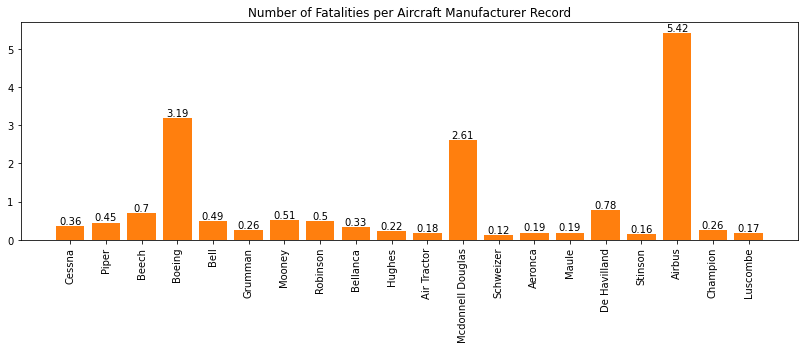

<Figure size 432x288 with 0 Axes>

In [94]:
# Create a bar chart of Aircraft Manufacturers vs. Fatalities

plt.figure(figsize=(20, 10)) 

fig, ax = plt.subplots()

x = top_20_Aircraft_Make
y = rounded_top_20_fatalities_normalized

# Plot the data
ax.bar(x, y)

bars = ax.bar(x, y)

ax.set_title('Number of Fatalities per Aircraft Manufacturer Record')
#ax.set_xlabel('Aircraft Make')
#ax.set_ylabel('Fatalities per Aircraft Manufacturer Record')

# Set the tick positions
ax.set_xticks(range(len(x)))

# Rotate x-axis labels
ax.set_xticklabels(x, rotation=90)

# Increase font size of x-axis labels
ax.tick_params(axis='x', labelsize=10)

# Adjust width of bar chart
plt.subplots_adjust(left=0.2, right=2)

# Show the numerical values for each Aircraft Manufacturer
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

# Creating an image of the following bar chart - "Number of Fatalities per Aircraft Manufacturer Record"

#plt.savefig("fatalities.jpg")

## 1) Recommendations for Aircraft Manufacturers based upon fatalities per Aircraft Manufacturer Record

Based on the bar chart - Schweizer (0.12), Stinson (0.16), Luscombe (0.17), Air Tractor (0.18), Aeronca (0.19), and Maule (0.19) - have the lowest number of fatalities per Aircraft Manufacturer record.

However, Schweizer, Stinson, Luscombe, Hughes, and Champion are no longer in existence.


Schweizer (0.12) is no longer in existence - https://en.wikipedia.org/wiki/Schweizer_Aircraft

Stinson (0.16) is no longer in existence - https://en.wikipedia.org/wiki/Stinson_Aircraft_Company

Luscombe (0.17) is no longer in existence - https://en.wikipedia.org/wiki/Luscombe_Aircraft

Hughes (0.22) no longer exists - https://en.wikipedia.org/wiki/Hughes_Aircraft_Company

Champion (0.26) was purchased by Bellanca - https://en.wikipedia.org/wiki/Champion_Aircraft 


My recommendation for Aircraft Manufactures are the following: Air Tractor (0.18), Aeronca (0.19), Maule (0.19), Grumman (0.26) and Bellanca (0.33).

In [78]:
# Calculating the total number of serious injuries for the Aircraft Manufacturers with the Top 20 Value Counts

top_20_serious_injuries = []

for make in top_20_Aircraft_Make:
    total_serious_injuries = (df.loc[df['Make'] == make, 'Total.Serious.Injuries']).sum(skipna=True, numeric_only=False)
    top_20_serious_injuries.append(total_serious_injuries)

In [79]:
# Examining what the data looks like in the following list - top_20_serious_injuries

print(top_20_serious_injuries)
len(top_20_serious_injuries)

[4894.0, 3059.0, 1095.0, 2157.0, 878.0, 197.0, 248.0, 223.0, 196.0, 229.0, 110.0, 652.0, 172.0, 156.0, 63.0, 187.0, 94.0, 323.0, 71.0, 71.0]


20

In [80]:
# Normalizing the data by dividing total serious injuries by Aircraft Manufacturer value count via numpy

top_20_serious_injuries_normalized = np.divide(top_20_serious_injuries, top_20_Aircraft_Make_value_count)

In [81]:
# Checking to see what the normalized data looks like and the length of the 'top_20_serious_injuries_normalized' list

print(top_20_serious_injuries_normalized)

len(top_20_serious_injuries_normalized)

[0.18026447 0.20571621 0.2038347  0.78579235 0.32255694 0.14111748
 0.18590705 0.18130081 0.18755981 0.24570815 0.12114537 0.75902212
 0.2225097  0.24528302 0.10696095 0.39534884 0.21412301 0.74595843
 0.16588785 0.17149758]


20

In [82]:
# I am going to minimize the number of decimals being printed

rounded_top_20_serious_injuries_normalized = [round(value, 2) for value in top_20_serious_injuries_normalized]

print(rounded_top_20_serious_injuries_normalized)

[0.18, 0.21, 0.2, 0.79, 0.32, 0.14, 0.19, 0.18, 0.19, 0.25, 0.12, 0.76, 0.22, 0.25, 0.11, 0.4, 0.21, 0.75, 0.17, 0.17]


<Figure size 1440x720 with 0 Axes>

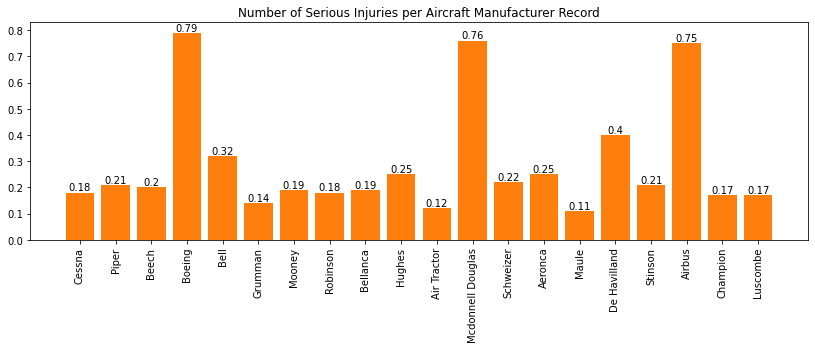

<Figure size 432x288 with 0 Axes>

In [83]:
# Create a bar chart of Aircraft Manufacturers vs. Serious Injuries


plt.figure(figsize=(20, 10)) 

fig, ax = plt.subplots()


x = top_20_Aircraft_Make
y = rounded_top_20_serious_injuries_normalized


# Plot the data
ax.bar(x, y)

bars = ax.bar(x, y)

ax.set_title('Number of Serious Injuries per Aircraft Manufacturer Record')
#ax.set_xlabel('Aircraft Make')
#ax.set_ylabel('Serious Injuries per Aircraft Manufacturer Record')

# Set the tick positions
ax.set_xticks(range(len(x)))

# Rotate x-axis labels
ax.set_xticklabels(x, rotation=90)

# Increase font size of x-axis labels
ax.tick_params(axis='x', labelsize=10)

# Adjust width of bar chart
plt.subplots_adjust(left=0.2, right=2)

# Show the numerical values for each Aircraft Manufacturer
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

# Creating an image of the following bar chart - "Number of Serious Injuries per Aircraft Manufacturer Record"

#plt.savefig("serious_injuries.jpg")

## 2) Recommendations for Aircraft Manufacturers based upon Serious Injuries per Aircraft Manufacturer Record

Based on the bar chart - Maule (0.11), Air Tractor (0.12), Grumman (0.14), Champion (0.17), Luscombe (0.17) - have the lowest number of serious injuries per Aircraft Manufacturer Record.

However, Champion and Luscomber are no longer in existence.

Champion (0.17) was purchased by Bellanca - https://en.wikipedia.org/wiki/Champion_Aircraft

Luscombe (0.17) is no longer in existence - https://en.wikipedia.org/wiki/Luscombe_Aircraft

Robinson (0.18) is also a helicopter company, not an airplane enterprise - https://www.robinsonheli.com/ 

My recommendation for Aircraft Manufactures are the following: Maule (0.11), Air Tractor (0.12), Grumman (0.14), Cessna (0.18), and a tie between Mooney (0.19) and Bellanca (0.19).

In [84]:
# Calculating the total number of Minor Injuries for the Aircraft Manufacturers with the Top 20 Value Counts

top_20_minor_injuries = []

for make in top_20_Aircraft_Make:
    total_minor_injuries = (df.loc[df['Make'] == make, 'Total.Minor.Injuries']).sum(skipna=True, numeric_only=False)
    top_20_minor_injuries.append(total_minor_injuries)

In [85]:
# Examining what the data looks like in the following list - top_20_minor_injuries

print(top_20_minor_injuries)
len(top_20_minor_injuries)

[6876.0, 3757.0, 1341.0, 2761.0, 1122.0, 368.0, 391.0, 320.0, 239.0, 344.0, 131.0, 1711.0, 148.0, 168.0, 98.0, 222.0, 128.0, 493.0, 99.0, 97.0]


20

In [86]:
# Normalizing the data by dividing total minor injuries by Aircraft Manufacturer value count via numpy

top_20_minor_injuries_normalized = np.divide(top_20_minor_injuries, top_20_Aircraft_Make_value_count)

In [87]:
# Checking to see what the normalized data looks like and the length of the 'top_20_minor_injuries_normalized' list

print(top_20_minor_injuries_normalized)

len(top_20_minor_injuries_normalized)

[0.253269   0.25265636 0.2496277  1.00582878 0.41219691 0.26361032
 0.29310345 0.2601626  0.22870813 0.36909871 0.14427313 1.99185099
 0.19146184 0.26415094 0.1663837  0.46934461 0.29157175 1.13856813
 0.23130841 0.23429952]


20

In [88]:
# I am going to minimize the number of decimals being printed

rounded_top_20_minor_injuries_normalized = [round(value, 2) for value in top_20_minor_injuries_normalized]

print(rounded_top_20_minor_injuries_normalized)

[0.25, 0.25, 0.25, 1.01, 0.41, 0.26, 0.29, 0.26, 0.23, 0.37, 0.14, 1.99, 0.19, 0.26, 0.17, 0.47, 0.29, 1.14, 0.23, 0.23]


<Figure size 1440x720 with 0 Axes>

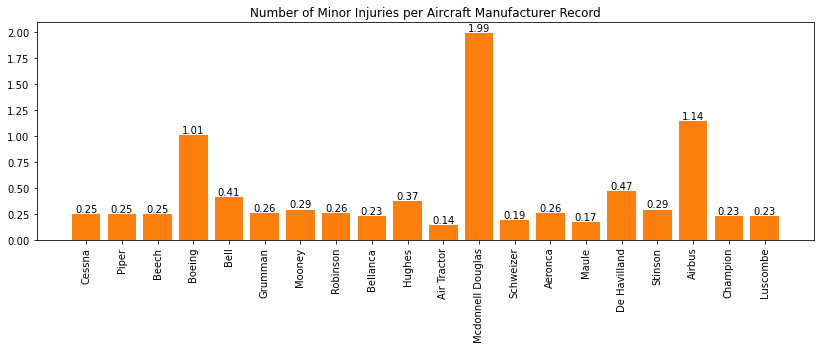

<Figure size 432x288 with 0 Axes>

In [89]:
# Create a bar chart of Aircraft Manufacturers vs. Minor Injuries


plt.figure(figsize=(20, 10)) 

fig, ax = plt.subplots()


x = top_20_Aircraft_Make
y = rounded_top_20_minor_injuries_normalized


# Plot the data
ax.bar(x, y)

bars = ax.bar(x, y)

ax.set_title('Number of Minor Injuries per Aircraft Manufacturer Record')
#ax.set_xlabel('Aircraft Make')
#ax.set_ylabel('Serious Injuries per Aircraft Manufacturer Record')

# Set the tick positions
ax.set_xticks(range(len(x)))

# Rotate x-axis labels
ax.set_xticklabels(x, rotation=90)

# Increase font size of x-axis labels
ax.tick_params(axis='x', labelsize=10)

# Adjust width of bar chart
plt.subplots_adjust(left=0.2, right=2)

# Show the numerical values for each Aircraft Manufacturer
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

# Creating an image of the following bar chart - "Number of Minor Injuries per Aircraft Manufacturer Record"

#plt.savefig("minor_injuries.jpg")

## 3) Recommendations for Aircraft Manufacturers based upon Minor Injuries per Aircraft Manufacturer Record

Based on the bar chart - Air Tractor (0.14); Maule (0.17); Schweizer (0.19); three-way tie between Bellanca (0.23), Champion (0.23), and Luscombe (0.23), and a three-way tie beween Cessna (0.25), Piper (0.25), and Beech (0.25).

However, Schweizer, Champion, Luscombe are no longer in existence.

Schweizer (0.19) is no longer in existence - https://en.wikipedia.org/wiki/Schweizer_Aircraft

Champion (0.23) was purchased by Bellanca - https://en.wikipedia.org/wiki/Champion_Aircraft 

Luscombe (0.23) is no longer in existence - https://en.wikipedia.org/wiki/Luscombe_Aircraft

Robinson (0.26) is a helicopter company, not an airplane enterprise - https://www.robinsonheli.com/.

My recommendation for Aircraft Manufactures are the following: Air Tractor (0.14); Maule (0.17), Bellanca (0.23); a three-way tie beween Cessna (0.25), Piper (0.25), and Beech (0.25); and a two-way tie between Grumman (0.26) and Aeronca (0.26).

# Conclusion

I idenified the Aircraft Manufacturers with the top 20 most records in the Aviation Data file.  Next, I examined the following - Number of Fatalities per Aircraft Manufacturer Record, Number of Serious Injuries per Aircraft Manufacturer Record, and Number of Minor Injuries per Aircraft Manufacturer Record.

1. Regarding Number of Fatalities per Aircraft Manufacturer Record, I recommend the following Aircraft Manufacturers: Air Tractor (0.18), Aeronca (0.19), Maule (0.19), Grumman (0.26) and Bellanca (0.33).


2. Regarding Number of Serious Injuries per Aircraft Manufacturer Record, I recommend the following Aircraft Manufacturers: Maule (0.11), Air Tractor (0.12), Grumman (0.14), Cessna (0.18), and a tie between Mooney (0.19) and Bellanca (0.19).


3. Regarding Number of Minor Injuries per Aircraft Manufacturer Record, I recommend the following Aircraft Manufacturers: Air Tractor (0.14); Maule (0.17), Bellanca (0.23); a three-way tie beween Cessna (0.25), Piper (0.25), and Beech (0.25); and a two-way tie between Grumman (0.26) and Aeronca (0.26).

# Next Steps

Next Steps will consist of the following three items.

1. Aircraft Models

- Within the recommended Aircraft Manufacturers, identify the aircraft models that produce the following: a) least amount of fatalities per accident record; b) least amount of serious injuries per accident record; and c) least amount of minor injuries per accident record.

2. Airbus

- Identify any Airbus models that have safety records in line with recommended aircraft manufacturers

3. Safety

- Identify factors that negatively impact the safety of a flight

